# <a name='contexto'>Contexto</a>
Um grande banco tem o objetivo de desenvolver um modelo para identificar maior probabilidade de <i>default</i>. A tarefa será realizar uma análise descritiva e tratamento dos dados para compreender o perfil dos clientes e, identificar quais fatores podem influenciar no risco de crédito.

Alguns esclarecimentos:
* O ***default*** é um processo que ocorre quando o devedor não consegue honrar com suas obrigações.
* <font color='red'>Este notebook trata-se de um exercício de caráter educativo/recreativo, havendo muito mais a ser explorado na base de dados.</font>
* Necessidade de conhecer melhor as <i>features</i>: renda (por mês, por ano?) e <i>t_risco</i> (nome formal desta feature, a fim de conhecer características e influência)

# <a name='indice'>Índice</a>
* [Contexto](#contexto)
* [Índice](#indice)
* [1. Importando Bibliotecas e Base de Dados](#secao_1)
* [2. Conhecendo e Tratando a Base de Dados](#secao_2)
* [3. Análise Descritiva](#secao_3)
* [4. Perfil dos Clientes](#secao_4)
* [5. Análise de Outliers](#secao_5)
* [6. Análise Bivariada](#secao_6) 
* [Conclusão](#conclusao)

#  <a name="secao_1">1. Importando Bibliotecas e Base de Dados</a>
[voltar ao índice](#indice)

In [92]:
import pandas as pd
import seaborn as sns
import statistics as st
import matplotlib.pyplot as plt

In [93]:
df_risco_credito = pd.read_csv('dados/risco_credito.csv')

In [94]:
df_risco_credito.head()

,default,t_risco,valor_emprestimo,prazo_pagamento,limite_credito,renda,signo,genero,perfil_facebook,n_emprestimos_inadiplentes
0,False,0.43,20024.31,60.0,62386.0,59869.05,virg,f,True,0.0
1,False,0.23,10046.51,36.0,NaN,46016.31,sagi,f,False,0.0
2,False,0.30,21228.25,60.0,NaN,48025.47,libr,m,True,0.0
3,False,0.15,23032.33,36.0,NaN,46011.12,NaN,m,False,0.0
4,False,0.08,24026.29,36.0,32366.0,90026.17,libr,m,NaN,0.0


#  <a name="secao_2">2. Conhecendo e Tratando a Base de Dados</a>
[voltar ao índice](#indice)

#### Informações gerais

In [95]:
df_risco_credito.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64592 entries, 0 to 64591
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   default                     59966 non-null  object 
 1   t_risco                     63807 non-null  float64
 2   valor_emprestimo            63807 non-null  float64
 3   prazo_pagamento             63807 non-null  float64
 4   limite_credito              44839 non-null  float64
 5   renda                       63807 non-null  float64
 6   signo                       43825 non-null  object 
 7   genero                      57406 non-null  object 
 8   perfil_facebook             58185 non-null  object 
 9   n_emprestimos_inadiplentes  63789 non-null  float64
dtypes: float64(6), object(4)
memory usage: 4.9+ MB


In [96]:
df_risco_credito.isnull().sum()

default                        4626
t_risco                         785
valor_emprestimo                785
prazo_pagamento                 785
limite_credito                19753
renda                           785
signo                         20767
genero                         7186
perfil_facebook                6407
n_emprestimos_inadiplentes      803
dtype: int64

### Consolidando base de dados

#### Tratando de valores nulos

Por conta da aparente irrelevância, e da elevada quantidade de valores faltantes, será excluída a coluna <i>signo</i>, da base de dados.

In [97]:
df_risco_credito.drop('signo', axis=1, inplace=True)

A coluna <i>limite_credito</i>, utilizarei a mediana em seu preenchimento.

In [98]:
df_risco_credito.limite_credito.fillna(df_risco_credito.limite_credito.median(), inplace=True)

Optarei por excluir os valores faltantes nas demais colunas(decisão que resultará na perda de aproximadamente 20% da base de dados)

In [99]:
df_risco_credito.dropna(inplace=True)

#  <a name="secao_3">3. Análise Descritiva</a>
[voltar ao índice](#indice)

#### Tratar features qualitativas

In [100]:
df_risco_credito.columns

Index(['default', 't_risco', 'valor_emprestimo', 'prazo_pagamento',
       'limite_credito', 'renda', 'genero', 'perfil_facebook',
       'n_emprestimos_inadiplentes'],
      dtype='object')

In [101]:
df_risco_credito.default = df_risco_credito.default.map({False:'Não', True:'Sim'})
df_risco_credito.perfil_facebook = df_risco_credito.perfil_facebook.map({False:'Não', True:'Sim'})
df_risco_credito.genero = df_risco_credito.genero.map({'m':'Masculino', 'f':'Feminino'})

#### Tratar features quantitativas

In [102]:
numericos = ['t_risco', 'valor_emprestimo', 'prazo_pagamento', 'limite_credito', 'renda', 'n_emprestimos_inadiplentes']

In [103]:
df_risco_credito[numericos].describe().round(2)

,t_risco,valor_emprestimo,prazo_pagamento,limite_credito,renda,n_emprestimos_inadiplentes
count,51259.00,51259.00,51259.00,51259.00,51259.00,51259.00
mean,0.29,13419.57,40.67,31379.34,71190.55,0.00
std,0.10,7957.40,9.50,30558.39,52157.41,0.08
min,0.00,527.07,36.00,0.00,4821.18,0.00
25%,0.22,7227.28,36.00,17289.00,44027.13,0.00
50%,0.29,12013.12,36.00,25775.00,60038.33,0.00
75%,0.36,18036.87,36.00,35003.50,85033.27,0.00
max,0.81,35059.60,60.00,613117.00,5000027.83,5.00


#### Coeficiente de Variação

In [104]:
def coeficiente_variacao(coluna):
    '''Essa função calcula o coeficiente de variação dos valores de uma determinada coluna, e as exibe'''
    coeficiente = st.stdev(coluna)/st.mean(coluna)
    print(f'CV_{coluna.name}:', round(coeficiente, 2))

In [105]:
_ = [coeficiente_variacao(df_risco_credito[coluna]) for coluna in numericos]

CV_t_risco: 0.34
CV_valor_emprestimo: 0.59
CV_prazo_pagamento: 0.23
CV_limite_credito: 0.97
CV_renda: 0.73
CV_n_emprestimos_inadiplentes: 17.47


#  <a name="secao_4">4. Perfil dos Clientes</a>
[voltar ao índice](#indice)

In [106]:
df_risco_credito.default.value_counts(normalize=True)

Não    0.841881
Sim    0.158119
Name: default, dtype: float64

In [107]:
df_risco_credito.genero.value_counts(normalize=True)

Masculino    0.676213
Feminino     0.323787
Name: genero, dtype: float64

In [108]:
df_risco_credito.perfil_facebook.value_counts(normalize=True)

Não    0.629841
Sim    0.370159
Name: perfil_facebook, dtype: float64

* 84% dos clientes não estão em situação <i>default</i>
* 67,6% são do gênero masculino
* 63% relataram não usarem o Facebook

#  <a name="secao_5">5. Análise de Outliers</a>
[voltar ao índice](#indice)

Para a exclusão de outliers, usarei como regra os valores abaixo de Q1 - 1.5 x Amplitude e valores acima de Q3 + 1.5 x Amplitude. Sendo que a amplitude é definida pelo valor Q1-Q3.

In [109]:
def limites(coluna):
    '''Essa function define os limites mínimo e máximo. Para que valores fora deste intervalo sejam excluídos'''
    q1 = coluna.quantile(0.25)
    q3 = coluna.quantile(0.75)
    amplitude = q3 - q1
    return q1 - 1.5 * amplitude, q3 + 1.5 * amplitude

def excluir_outliers(df, nome_coluna):
    '''Essa function exclui os outliers que estão fora da área delimitada'''
    qtde_linhas = df.shape[0]
    limite_inferior, limite_superior = limites(df[nome_coluna])
    df = df.loc[(df[nome_coluna] >= limite_inferior) & (df[nome_coluna] <= limite_superior),:]
    print('Foram removidas {} linhas/outliers'.format(qtde_linhas - df.shape[0]))
    return df

In [110]:
def grafico_boxplot(coluna):
    '''Function para plotar um gráfico boxplot simples, bastando passar a coluna'''
    plt.figure(figsize=(10,4))
    sns.boxplot(x = coluna, showmeans=True).set(title = coluna.name.capitalize(), xlabel=None)
    
def grafico_histograma(coluna):
    '''Function para plotar um gráfico histograma simples, bastando passar a coluna'''
    sns.displot(coluna, bins=25, height=5, aspect=2)\
    .set(title = coluna.name.capitalize(), xlabel=None)
    
def grafico_boxplot_bivariada(x, y, hue, df):
    '''Function para plotar um gráfico boxplot multiplo, requer passar nome das três colunas,
    sendo opcional especificar o dataframe'''
    plt.figure(figsize=(14,5))
    sns.boxplot(data=df, x=df[x], y=df[y], hue=df[hue], showmeans=True).set(title=df[x].name.capitalize(),xlabel=None)

#### Feature renda

No caso desta feature, se tornou necessária a exclusão dos outliers para melhor proveito do boxplot.

In [111]:
df_risco_credito = excluir_outliers(df_risco_credito, 'renda')

Foram removidas 2434 linhas/outliers


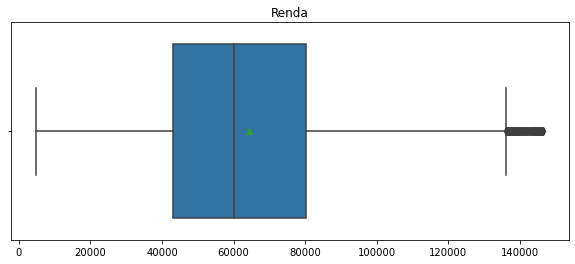

In [112]:
grafico_boxplot(df_risco_credito.renda)

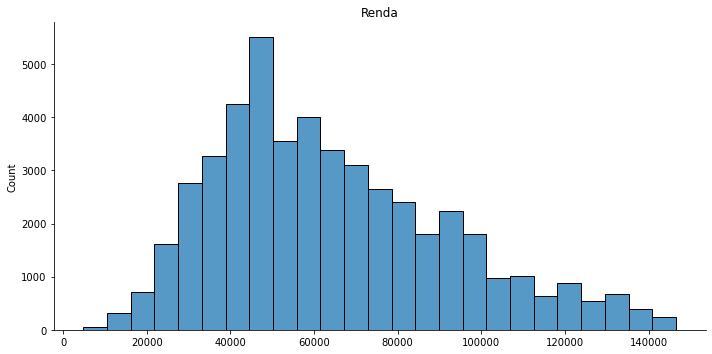

In [113]:
grafico_histograma(df_risco_credito.renda)

#### Feature valor_emprestimo

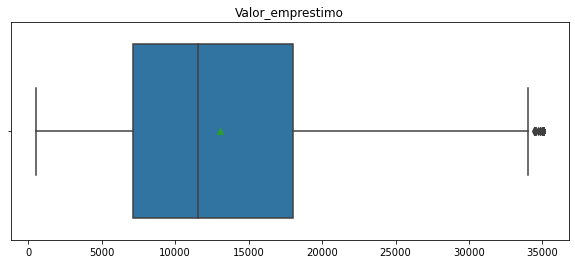

In [114]:
grafico_boxplot(df_risco_credito.valor_emprestimo)

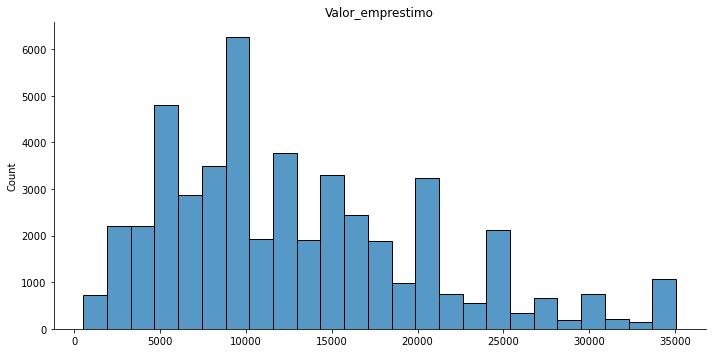

In [115]:
grafico_histograma(df_risco_credito.valor_emprestimo)

#### Feature limite_credito

Para a verificação do limite de crédito, também iremos excluir outliers

In [116]:
df_risco_credito = excluir_outliers(df_risco_credito, 'limite_credito')

Foram removidas 5049 linhas/outliers


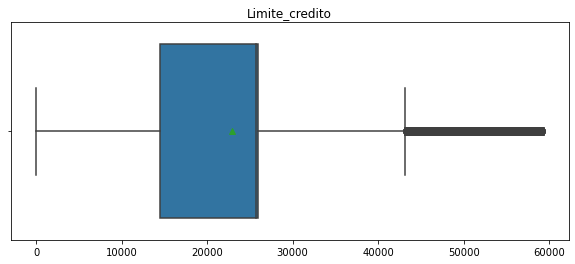

In [117]:
grafico_boxplot(df_risco_credito.limite_credito)

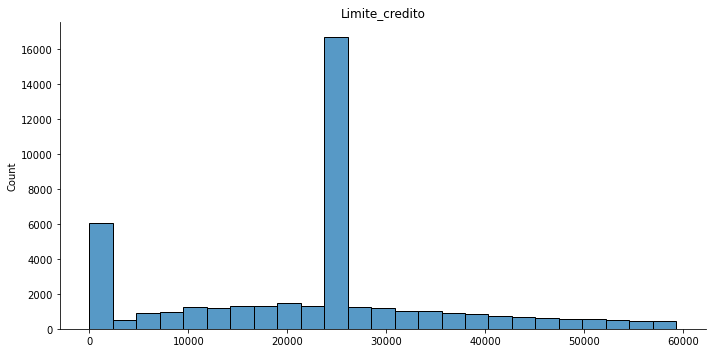

In [118]:
grafico_histograma(df_risco_credito.limite_credito)

#  <a name="secao_6">6. Análise Bivariada</a>
[voltar ao índice](#indice)

* default x prazo_pagamento
* Há a relação entre renda e default?
* renda x inadiplentes x genero
* default x perfil_facebook x genero

In [119]:
# resumindo nome do dataframe
df_rc=df_risco_credito
df_rc.columns

Index(['default', 't_risco', 'valor_emprestimo', 'prazo_pagamento',
       'limite_credito', 'renda', 'genero', 'perfil_facebook',
       'n_emprestimos_inadiplentes'],
      dtype='object')

##### O prazo de pagamento em relação com a situação default

<AxesSubplot:xlabel='prazo_pagamento', ylabel='count'>

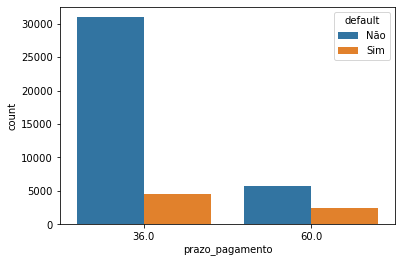

In [129]:
sns.countplot(data=df_rc, x='prazo_pagamento', hue='default')

##### Número de empréstimos inadiplentes por renda e separado por gênero

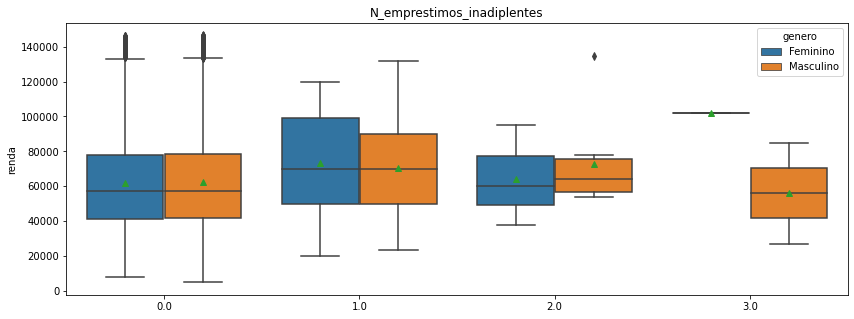

In [122]:
grafico_boxplot_bivariada('n_emprestimos_inadiplentes', 'renda', 'genero', df_rc)

Adequando dados para o pairplot

In [127]:
df_pairplot = df_rc[['t_risco','valor_emprestimo', 'limite_credito','renda', 'default']].copy()

In [128]:
df_pairplot.default = df_pairplot.default.map({'Não':False, 'Sim':True})
df_pairplot.default = df_pairplot.default.astype(dtype='bool', copy=False)

###### Pairplot para observação das features 't_risco','valor_emprestimo', 'limite_credito','renda' e 'default' 

<Figure size 720x504 with 0 Axes>

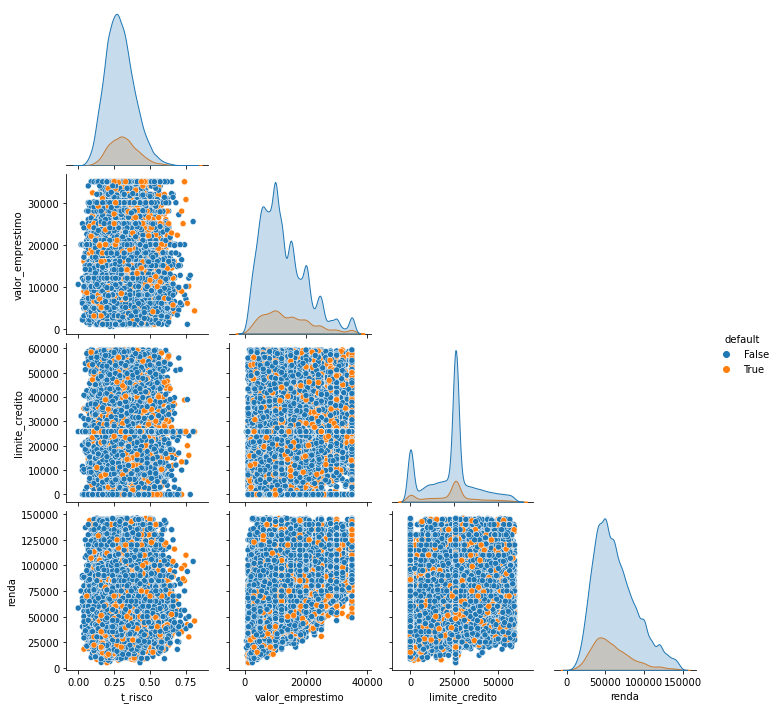

In [131]:
plt.figure(figsize=(10, 7))
sns.pairplot(data=df_pairplot, corner=True, hue='default')

##### Matriz de correlação

<AxesSubplot:>

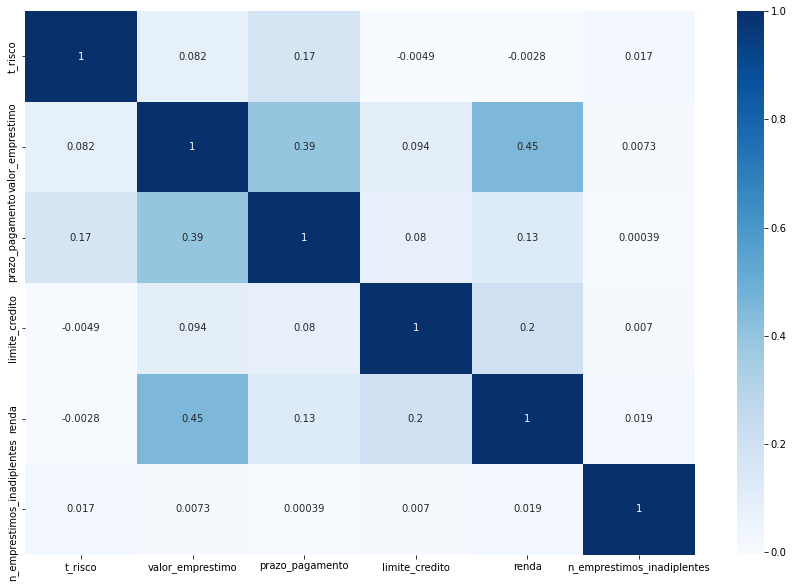

In [134]:
plt.figure(figsize=(15,10))
sns.heatmap(df_rc[numericos].corr(), annot = True, cmap = 'Blues')

#  <a name="conclusao">Conclusão</a>
[voltar ao índice](#indice)

Em questão ao conjunto de dados analisados, foram observadas as seguintes características:
* A renda média dos clientes está na faixa dentre 40 e 60 mil, todavia, possui uma distribuição levemente assimétrica à direita.<br><br>

* Quanto a sua distribuição na base de clientes, o valor do empréstimo segue uma tendência similar ao observado na renda, apresentando leve assimetria à direita. Além do mais, é observado que, o valor do empréstimo segue uma correlação considerada ***regular*** em relação ao valor da renda.<br><br>

* Acerca do limite de crédito, este segue uma gama variada de valores, entretanto, é unânime a predominância do valor aproximado de 25 mil.<br><br>

* A distribuição do prazo de pagamento entre aqueles em default ou não, apresentam uma normalidade. Não havendo motivos de preocupação. Mas é observada que, clientes que estejam em dia com suas contas, tendem a escolher prazos mais curtos.<br><br>

* É quase que homogênea a distribuição das características dos clientes em default, daqueles que não estejam em default. Não ocorrendo qualquer tipo de segregação dentre estes dois grupos.<br><br>

* No que tange o número de empréstimos inadiplentes. É observada que, em estágios iniciais e intermediários de inadiplência, tanto homens quanto mulheres estão em situação levemente similar, apresentando ligeira predominância feminina. Entretanto, a partir de três contas inadiplentes. Dois fenômenos podem ser observador:
    1. Mulheres normalmente quitam mais seus débitos. Havendo apenas a incidência de poucas, cuja renda é superior a masculina.
    2. A predominância de homens nessa faixa de inadiplência. Sendo que estes tem renda ligeiramente inferior a observada no grupo feminino.<br><br>    
    
* Em nosso pairplot é demonstrada a homogeneidade quanto a situação dos clientes. Podendo ressaltar que, dentre os que estão em situação <i>default</i>, normalmente estão dentre aqueles cujo valor do empréstimo está acima dos 20 mil. E a relação entre valor do emprestimo e renda. Principalmente a partir dos valores inferiores. <br><br>